# Résolution analytique du modèle d'instabilité d'Eady

Auteur : FERRY Frédéric (DESR/ENM/C3M) - février 2021
Adapté d'un code Matlab tiré de Holton (2004)

In [76]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, cos, sin, cosh, sinh, real, imag, exp, meshgrid, linspace, arange
from cmath import sqrt

import warnings
warnings.filterwarnings('ignore')

# Vitesse de phase et taux de croissance

In [77]:
omega = 7.292e-5
lat = 45 # latitude
f = 2*omega*sin(lat*pi/180)# Coriolis parameter
N2 = 1.e-4 # buoyancy frequency squared
H = 10000 # tropopause height in meters
R=287 # gas constant
Shear = 30/H # wind shear in sec^-1
m = pi/3.e6 # meridional wavenumber in 1/m

In [78]:
K = []
Cr = []
SIGMA = []
L = range(1000,15200,100)

for l in L:
    K.append(2*pi/(l*1000))
    k = 2*pi/(l*1000) # zonal wave number
    alph2 = (k**2 + m**2)*N2/f**2
    alph = sqrt(alph2)
    alphH = alph*H
    Cr.append(real(Shear*H/2*(1+sqrt(1-4*cosh(alphH)/(alphH*sinh(alphH))+4/(alphH**2)))))
    SIGMA.append(k*imag(Shear*H/2*(1+sqrt(1-4*cosh(alphH)/(alphH*sinh(alphH))+4/(alphH**2)))))

#print(K)
#print(Cr)
#print(SIGMA)

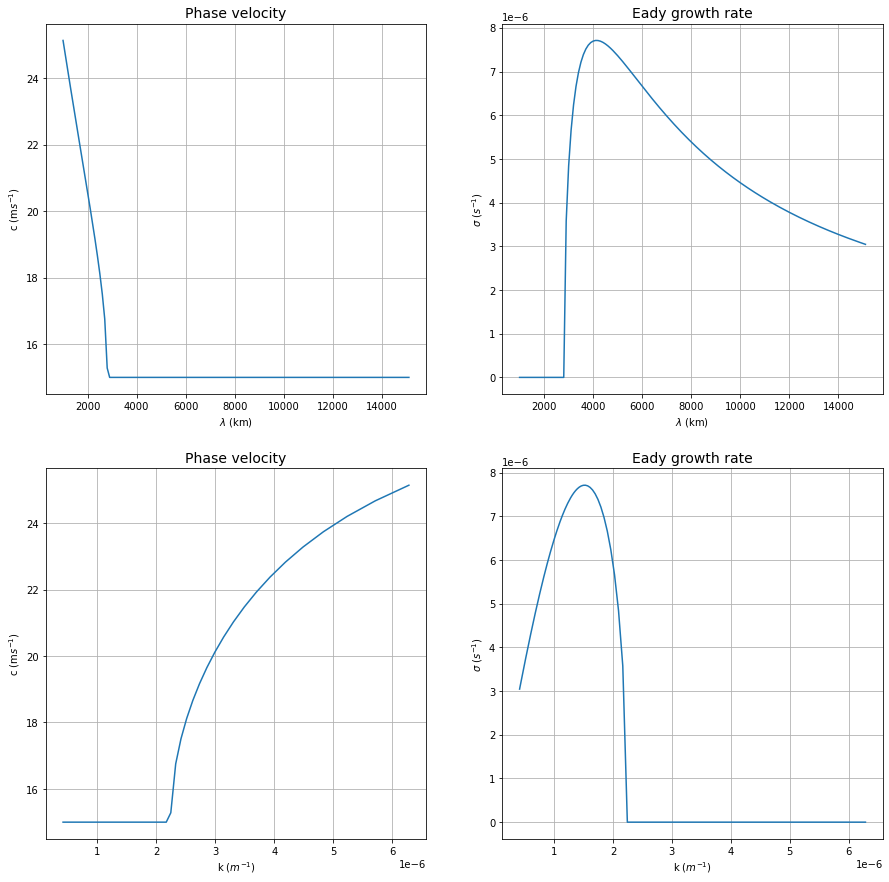

In [80]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(221)
ax.set_title('Phase velocity', fontsize=14)
plt.grid(True)
plt.xlabel("$\lambda$ (km)", fontsize=10)
plt.ylabel("c (m$s^{-1}$)", fontsize=10)
ax.plot(L,Cr)

ax = fig.add_subplot(222)
ax.set_title('Eady growth rate', fontsize=14)
plt.grid(True)
plt.xlabel("$\lambda$ (km)", fontsize=10)
plt.ylabel("$\sigma$ ($s^{-1}$)", fontsize=10)
ax.plot(L,SIGMA)

ax = fig.add_subplot(223)
ax.set_title('Phase velocity', fontsize=14)
plt.grid(True)
plt.xlabel("k ($m^{-1}$)", fontsize=10)
plt.ylabel("c (m$s^{-1}$)", fontsize=10)
ax.plot(K,Cr)

ax = fig.add_subplot(224)
ax.set_title('Eady growth rate', fontsize=14)
plt.grid(True)
plt.xlabel("k ($m^{-1}$)", fontsize=10)
plt.ylabel("$\sigma$ ($s^{-1}$)", fontsize=10)
ax.plot(K,SIGMA)

figname='./eady0'
plt.savefig(figname+'.png',bbox_inches='tight')

plt.show()

In [79]:
print("Rossby deformation radius (km)")
print(real(sqrt(N2)*H/f)/1000)
print("Cutoff wave number (m-1)")
print(K[ind])
print("Cutoff wavelength (km)")
print(L[ind])
print("Maximal growth rate (s-1)")
print(np.max(SIGMA))
print("Wave number for maximal growth (m-1)")
print(K[np.argmax(SIGMA)])
print("Wavelength for maximal growth (km)")
print(L[np.argmax(SIGMA)])

Rossby deformation radius (km)
969.7021135306468
Cutoff wave number (m-1)
2.243994752564138e-06
Cutoff wavelength (km)
2800
Maximal growth rate (s-1)
7.711155402858523e-06
Wave number for maximal growth (m-1)
1.5324842212633137e-06
Wavelength for maximal growth (km)
4100


<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b>A partir de quelle longueur d'onde observe-t-on des solutions instables ?</p>
<p><b>2) </b>Quelle est la vitesse de phase des solutions instables ?</p>
<p><b>3) </b>Quelle est la longueur d’onde du mode le plus instable (taux de croissance maximal) ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

# Structure de la solution la plus instable

In [81]:
Lx = int(input("Longueur d'onde du mode le plus instable (km) : "))

Longueur d'onde du mode le plus instable (km) : 4100


In [82]:
k = 2*pi/(Lx*1000) # zonal wave number
alph2 = (k**2 + m**2)*N2/f**2
alph = sqrt(alph2)

In [83]:
xx = linspace(0,1.5*Lx,31) # gridpoints in x   
yy = linspace(-1500,1500,21) # gridpoints in y
zz = linspace(0,H,21) # gridpoints in z
x,y = meshgrid(xx*1000,yy*1000) # Sets matrix for grid system in x and y
x,z = meshgrid(xx*1000,zz) # matrix for grid system in x and z

print(xx)
print(yy)
print(zz)

[   0.  205.  410.  615.  820. 1025. 1230. 1435. 1640. 1845. 2050. 2255.
 2460. 2665. 2870. 3075. 3280. 3485. 3690. 3895. 4100. 4305. 4510. 4715.
 4920. 5125. 5330. 5535. 5740. 5945. 6150.]
[-1500. -1350. -1200. -1050.  -900.  -750.  -600.  -450.  -300.  -150.
     0.   150.   300.   450.   600.   750.   900.  1050.  1200.  1350.
  1500.]
[    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000.]


In [84]:
A = 2.e7 # streamfunction amplitude

alphH = alph*H
c = Shear*H/2*(1+sqrt(1-4*cosh(alphH)/(alphH*sinh(alphH))+4/(alphH**2)))
ci = imag(c)
print(c)

B = -c*alph*A/Shear

(15+5.031800847190309j)


In [85]:
i=complex(0,1)

# Eddy streamfunction at t = 0
psi = (A*sinh(alph*z)+B*cosh(alph*z))*exp(i*k*x)
# Eady temperature
T = f*H/R*(alph*A*cosh(alph*z)+alph*B*sinh(alph*z))*exp(i*k*x);  
# Eddy vertical velocity
w = (f/N2*k*i*((c-Shear*z)*(alph*A*cosh(alph*z)+B*alph*sinh(alph*z))+
                  Shear*(A*sinh(alph*z)+B*cosh(alph*z)))*exp(i*k*x))

print(psi.shape) # z,x

# Eady geopotential
phi=f*psi
print(np.min(real(phi)))

# Eady meridional wind
dxy,dxx=np.gradient(x)
dyy,dyx=np.gradient(y)
v=(1/f)*(np.gradient(phi,axis=1)/dxx)

print(np.min(real(psi)))
print(np.max(real(psi)))
print(np.min(real(T)))
print(np.max(real(T)))
print(np.min(real(w)))
print(np.max(real(w)))
print(np.min(real(v)))
print(np.max(real(v)))

(21, 31)
-1957.6674530709918
-18983542.66833099
18983542.668330986
-12.93453868112709
12.93453868112709
-0.030847681866403937
0.03084768186640394
-28.973659486587312
28.61579169734738


# Tracés

In [86]:
levels_psi = arange(-1.8, 2, 0.2)

levels_t = arange(-12, 13, 1)
levels_tneg = arange(-12, -1, 1)
levels_tpos= arange(0, 13, 1)

levels_v = arange(-30, 35, 5)
levels_vT = arange(-200, 220, 20)

levels_phi = arange(-18, 20, 2)
levels_phineg = arange(-18, -2, 2)
levels_phipos = arange(0, 20, 2)

levels_w = arange(-30, 35, 5)
levels_wneg = arange(-30, -5, 5)
levels_wpos = arange(0, 35, 5)

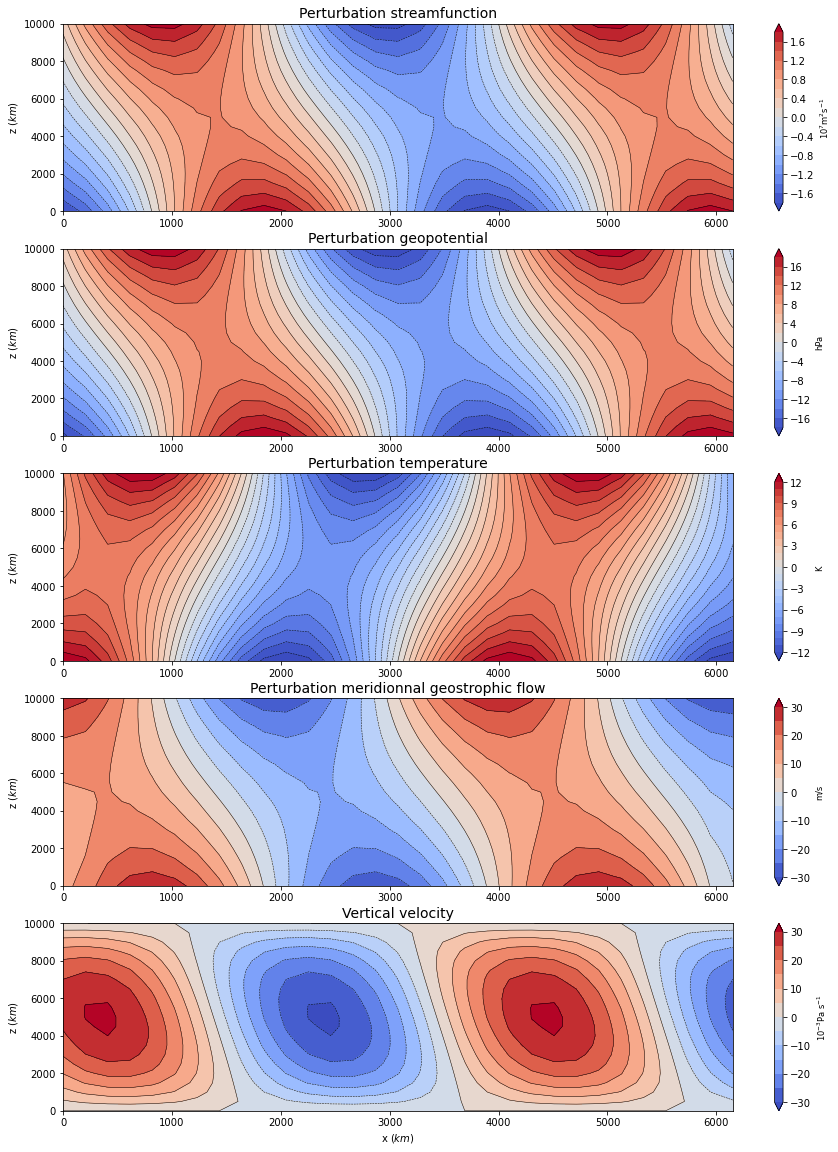

In [87]:
fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(511)
ax.set_title('Perturbation streamfunction', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(psi)*1e-7, levels_psi, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('$10^7$m$^2$s$^{-1}$', size='small')
c = ax.contour(xx, zz, real(psi)*1e-7, levels_psi, colors='k', linewidths=0.5)

ax = fig.add_subplot(512)
ax.set_title('Perturbation geopotential', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(phi)*1e-2, levels_phi, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('hPa', size='small')
c = ax.contour(xx, zz, real(phi)*1e-2, levels_phi, colors='k', linewidths=0.5)

ax = fig.add_subplot(513)
ax.set_title('Perturbation temperature', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(T), levels_t, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('K', size='small')
c = ax.contour(xx, zz, real(T), levels_t, colors='k', linewidths=0.5)

ax = fig.add_subplot(514)
ax.set_title('Perturbation meridionnal geostrophic flow', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(v), levels_v, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('m/s', size='small')
c = ax.contour(xx, zz, real(v), levels_v, colors='k', linewidths=0.5)

ax = fig.add_subplot(515)
ax.set_title('Vertical velocity', fontsize=14)
plt.xlabel("x ($km$)", fontsize=10)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(w)*1e3, levels_w, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('$10^{-3}$Pa s$^{-1}$', size='small')
c = ax.contour(xx, zz, real(w)*1e3, levels_w, colors='k', linewidths=0.5)

figname='./eady1'
plt.savefig(figname+'.png',bbox_inches='tight')

plt.show()

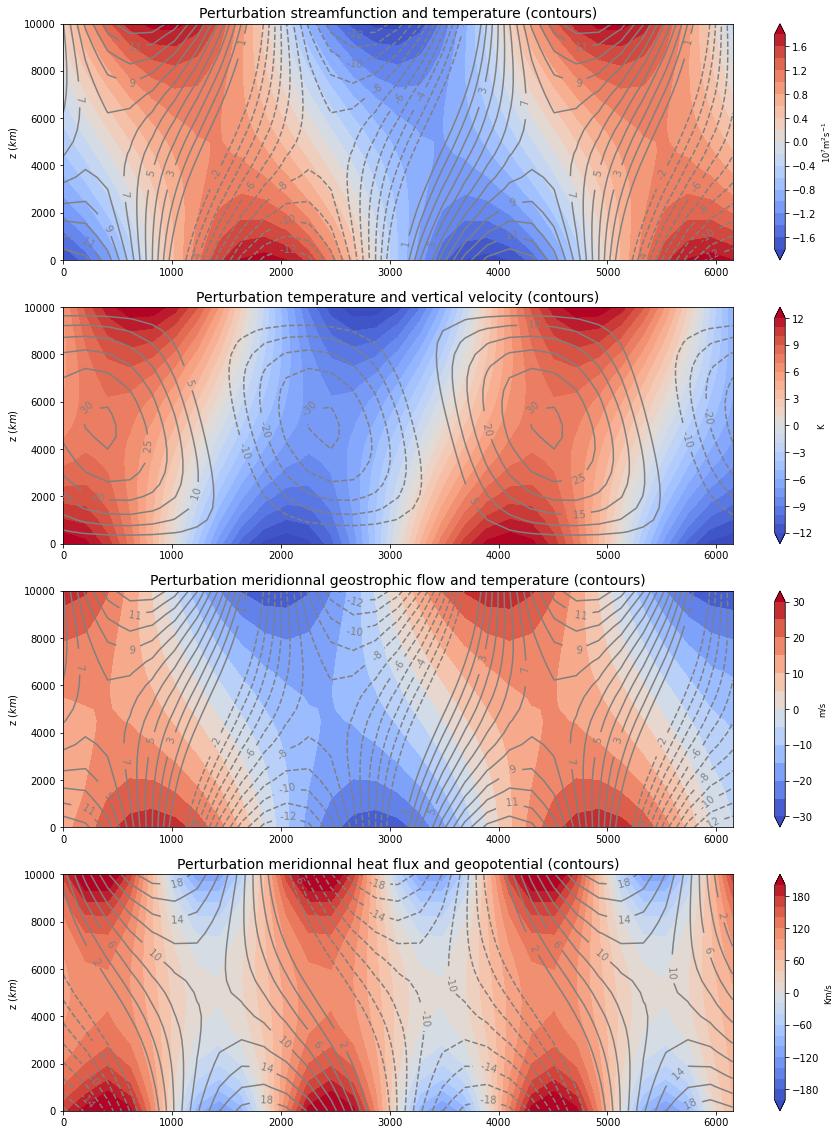

In [89]:
fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(411)
ax.set_title('Perturbation streamfunction and temperature (contours)', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(psi)*1e-7, levels_psi, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('$10^7$m$^2$s$^{-1}$', size='small')
c = ax.contour(xx, zz, real(T), levels_tpos[levels_tpos!=0], colors='grey', linestyles='-')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)
c = ax.contour(xx, zz, real(T), levels_tneg[levels_tneg!=0], colors='grey', linestyles='--')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)

ax = fig.add_subplot(412)
ax.set_title('Perturbation temperature and vertical velocity (contours)', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(T), levels_t, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('K', size='small')
c = ax.contour(xx, zz, real(w)*1e3, levels_wpos[levels_wpos!=0], colors='grey', linestyles='-')
ax.clabel(c, fmt='%4.1i', fontsize=10)
c = ax.contour(xx, zz, real(w)*1e3, levels_wneg[levels_wneg!=0], colors='grey', linestyles='--')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)

ax = fig.add_subplot(413)
ax.set_title('Perturbation meridionnal geostrophic flow and temperature (contours)', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(v), levels_v, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('m/s', size='small')
c = ax.contour(xx, zz, real(T), levels_tpos[levels_tpos!=0], colors='grey', linestyles='-')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)
c = ax.contour(xx, zz, real(T), levels_tneg[levels_tneg!=0], colors='grey', linestyles='--')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)


ax = fig.add_subplot(414)
ax.set_title('Perturbation meridionnal heat flux and geopotential (contours)', fontsize=14)
plt.ylabel("z ($km$)", fontsize=10)
cf = ax.contourf(xx, zz, real(v)*real(T), levels_vT, cmap='coolwarm', extend='both')
cb = fig.colorbar(cf, orientation='vertical')
cb.set_label('Km/s', size='small')
c = ax.contour(xx, zz, real(phi)*1e-2, levels_phipos[levels_phipos!=0], colors='grey', linestyles='-')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)
c = ax.contour(xx, zz, real(phi)*1e-2, levels_phineg[levels_phineg!=0], colors='grey', linestyles='--')
ax.clabel(c, c.levels[::2], fmt='%4.1i', fontsize=10)

figname='./eady2'
plt.savefig(figname+'.png',bbox_inches='tight')

plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b>Où sont localisées les anomalies maximales de ψ’, V’ et T’ ?</p>
<p><b>2) </b>Où sont localisés les maxima/minima de vitesses verticales W ?</p>
<p><b>3) </b>Quel est le phasage entre l’onde de pression et l’onde de température au sol ? Même question à la tropopause.</p>
<p><b>4) </b>Quel est le signe de V’T’ (transport méridien de chaleur) de part et d’autre des thalwegs/dorsales ?</p>
<p><b>5) </b>Les ascendances ont-elles lieu dans l’air froid ou dans l’air chaud ? Même question pour les subsidences.</p>
<p><b>6) </b>Quelle est l’orientation verticale des axes des thalwegs/dorsales par rapport au cisaillement vertical du vent zonal de l’état de base ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>